In [78]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [79]:
qt = pd.read_csv("QuadTree.csv")

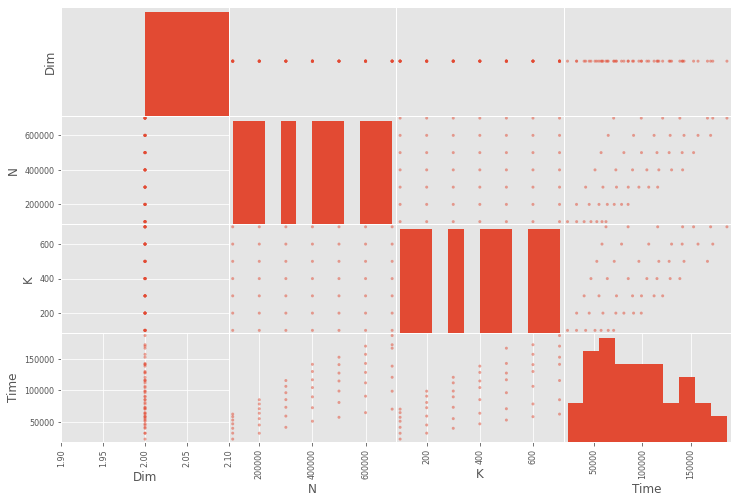

In [93]:
pd.plotting.scatter_matrix(qt)
fig = plt.gcf()
fig.set_size_inches(12, 8, forward=True)
plt.show()

In [81]:
qt_regression = sm.ols(formula="Time ~ N + K", data=qt).fit()
qt_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     382.2
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           2.21e-29
Time:                        05:20:38   Log-Likelihood:                -521.05
No. Observations:                  49   AIC:                             1048.
Df Residuals:                      46   BIC:                             1054.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.129e+04   4443.135     -4.791      0.000   -3.02e+04   -1.23e+04
N              0.1534      0.007     20.718      0.000       0.139       0.168
K            135.5583      7.405     18.306      0.000     120.652     150.464
==============================================================================
Omnibus:                       12.865   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.377
Skew:                          -1.206   Prob(JB):                      0.00125
Kurtosis:                       3.858   Cond. No.                     1.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

QUADTREE: Looking at the scatter matrix for quadTrees, dimension is held constant as shown in the vertical data. There seems to be linear looking relationship between Time, and N and K. In the Big(O) QuadTrees should have log base 4 + some constant depending on the size of k and max leaf size. The scatter plots for N and K look linear which would be constant time, but I was expecting it to look more logarithmic but maybe the additional constant (K, leaf size) makes the data look more linear rather than log like. The r-squared value of 94% seems really high indicating a very strong linear relationship. I would expect the scatter plot to look more perfectly linear with a value this high. Both N and K are significant variables impacting time according to the p-values. The coefficient values make sense in context, each increment in k should be much more significant in time than each increment of N. 

In [82]:
kd = pd.read_csv("KDTree.csv")

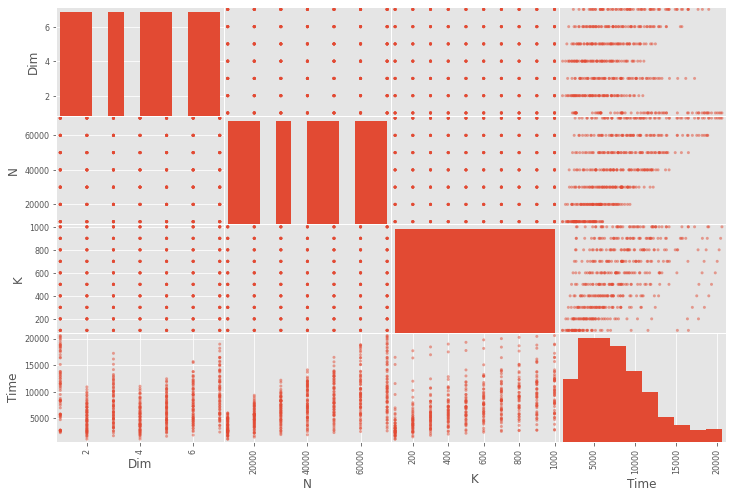

In [83]:
pd.plotting.scatter_matrix(kd)
fig = plt.gcf()
fig.set_size_inches(12, 8, forward=True)
plt.show()

In [84]:
kd_regression = sm.ols(formula="Time ~ N + K + Dim", data=kd).fit()
kd_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     238.6
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           3.91e-95
Time:                        05:20:40   Log-Likelihood:                -4555.9
No. Observations:                 490   AIC:                             9120.
Df Residuals:                     486   BIC:                             9137.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1177.7905    426.366     -2.762      0.006   -2015.540    -340.041
N              0.1261      0.006     21.058      0.000       0.114       0.138
K              6.8821      0.417     16.501      0.000       6.063       7.702
Dim           13.3612     59.899      0.223      0.824    -104.332     131.055
==============================================================================
Omnibus:                       64.532   Durbin-Watson:                   0.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.313
Skew:                           0.894   Prob(JB):                     5.46e-21
Kurtosis:                       4.173   Cond. No.                     1.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

KDTREE: The scatter plots show a linear relationship between Time and Dimension, K, and N. The r-squared value of 60% indicating a weak linear relationship matches the shape of the scatter plots for Dim, K, and N. Dimension has the highest impact on Time which makes sense to me in the context of binary trees growing exponentially but the p-value of 82% is extremely large meaning a high probability that the variable is not significant to the model. Maybe if I had a larger data set the variable would be more significant, but I can't be sure.  

In [85]:
dumb = pd.read_csv("DumbKNN.csv")

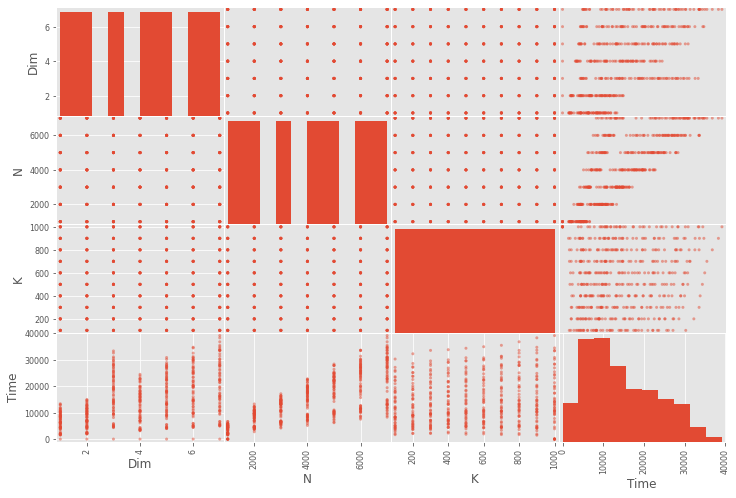

In [86]:
pd.plotting.scatter_matrix(dumb)
fig = plt.gcf()
fig.set_size_inches(12, 8, forward=True)
plt.show()

In [88]:
dumb_regression = sm.ols(formula="Time ~ N + K + Dim", data=dumb).fit()
dumb_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     848.3
Date:                Mon, 12 Jul 2021   Prob (F-statistic):          1.09e-192
Time:                        05:20:43   Log-Likelihood:                -4699.1
No. Observations:                 490   AIC:                             9406.
Df Residuals:                     486   BIC:                             9423.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9623.9782    571.062    -16.853      0.000   -1.07e+04   -8501.922
N              3.3822      0.080     42.157      0.000       3.225       3.540
K              3.4206      0.559      6.123      0.000       2.323       4.518
Dim         2168.0204     80.227     27.023      0.000    2010.385    2325.656
==============================================================================
Omnibus:                        0.195   Durbin-Watson:                   0.182
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.122
Skew:                           0.035   Prob(JB):                        0.941
Kurtosis:                       3.031   Cond. No.                     1.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
bucket = pd.read_csv("BucketKNN.csv")

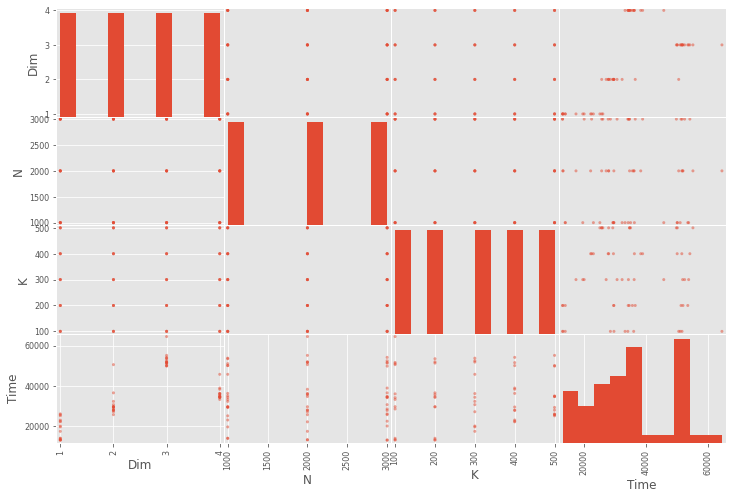

In [90]:
pd.plotting.scatter_matrix(bucket)
fig = plt.gcf()
fig.set_size_inches(12, 8, forward=True)
plt.show()

In [91]:
bucket_regression = sm.ols(formula="Time ~ N + K + Dim", data=bucket).fit()
bucket_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     12.69
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           1.94e-06
Time:                        05:20:44   Log-Likelihood:                -637.73
No. Observations:                  60   AIC:                             1283.
Df Residuals:                      56   BIC:                             1292.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.615e+04   5426.070      2.976      0.004    5277.275     2.7e+04
N             -0.2232      1.636     -0.136      0.892      -3.501       3.054
K              2.0265      9.446      0.215      0.831     -16.895      20.948
Dim         7366.5533   1194.781      6.166      0.000    4973.119    9759.988
==============================================================================
Omnibus:                        6.402   Durbin-Watson:                   0.519
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                5.757
Skew:                           0.679   Prob(JB):                       0.0562
Kurtosis:                       2.324   Cond. No.                     8.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""